### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below21, 21-25, 26-30, 31-35, 36-40, 41-45, 46-50, 50+.
    -  age: below21,  21,........26,.........31,.......36,.......41,.......46,......50+.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she eats at a restaurant with average expense \\$20-\\$50 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

### 1. <br>
Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 2. <br>
Investigate the dataset for missing or problematic data.

In [4]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

**Let's check % of missing data in each column**

In [5]:
prop = None
for col in data.columns:
    prop = data[col].isnull().sum() / data.shape[0]
    if prop > 0:
        print(f'{col} has {prop:.2%} missing values')

car has 99.15% missing values
Bar has 0.84% missing values
CoffeeHouse has 1.71% missing values
CarryAway has 1.19% missing values
RestaurantLessThan20 has 1.02% missing values
Restaurant20To50 has 1.49% missing values


### 3. <br>
Decide what to do about your missing data -- drop, replace, other...

We will drop the missing data as the % of missing data is very less in each column. Column Car has 95% missing data, so we will drop this column.

In [6]:
# drop entire column named 'car'
data = data.drop('car', axis=1)

# drop rows with missing values in these columns: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
data.shape

(12079, 25)

### 4. <br>
What proportion of the total observations chose to accept the coupon? 



In [7]:
print(data['Y'].value_counts(normalize=True))
coupon_acceptance = data['Y'].value_counts(normalize=True)
print(f'{coupon_acceptance[1]:.2%}')

Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64
56.93%


[Text(0.5, 0, 'Acceptance (0 = No, 1 = Yes)'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Coupons offered and Acceptance')]

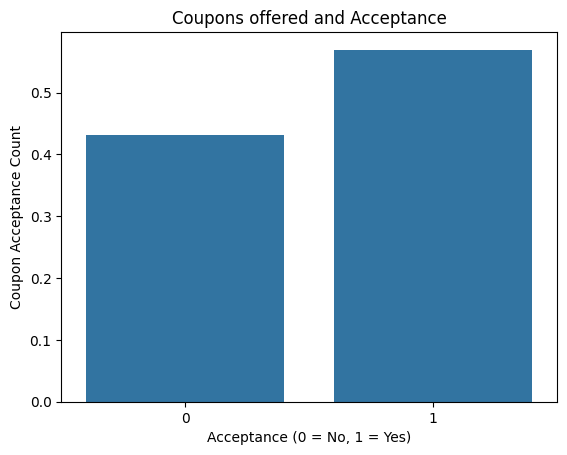

In [8]:
coupon_acceptance = pd.DataFrame(coupon_acceptance)
coupon_acceptance.reset_index(inplace=True)
coupon_acceptance_plt = sns.barplot(coupon_acceptance, x='Y', y='proportion')
coupon_acceptance_plt.set(xlabel='Acceptance (0 = No, 1 = Yes)', ylabel='Coupon Acceptance Count', title='Coupons offered and Acceptance')

[Text(0.5, 0, 'Acceptance (0 = No, 1 = Yes)'),
 Text(0, 0.5, 'Coupon Acceptance Count'),
 Text(0.5, 1.0, 'Coupons offered and Acceptance')]

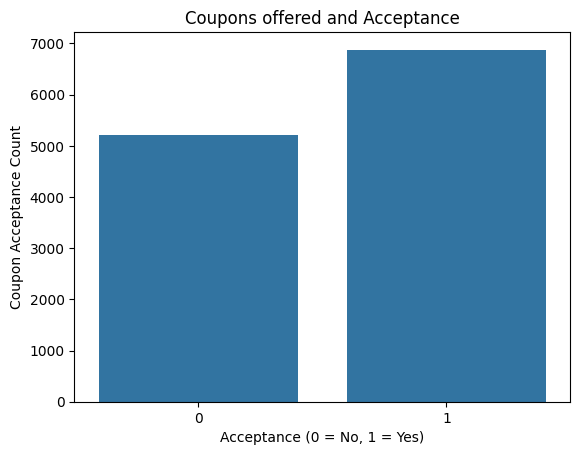

In [9]:
coupon_acceptance2 = data['Y'].value_counts()
coupon_acceptance2 = pd.DataFrame(coupon_acceptance2).reset_index()
coupon_acceptance2.columns = ['Y', 'Count']
coupon_acceptance_plt2 = sns.barplot(coupon_acceptance2, x='Y', y='Count')
coupon_acceptance_plt2.set(xlabel='Acceptance (0 = No, 1 = Yes)', ylabel='Coupon Acceptance Count', title='Coupons offered and Acceptance')

### 5. <br>
Use a bar plot to visualize the `coupon` column.

In [10]:
grouped_data = data.groupby(['coupon', 'Y']).size().reset_index(name='counts')
grouped_data

,coupon,Y,counts
0,Bar,0,1125
1,Bar,1,788
2,Carry out & Take away,0,598
3,Carry out & Take away,1,1682
4,Coffee House,0,1922
5,Coffee House,1,1894
6,Restaurant(20-50),0,785
7,Restaurant(20-50),1,632
8,Restaurant(<20),0,772
9,Restaurant(<20),1,1881


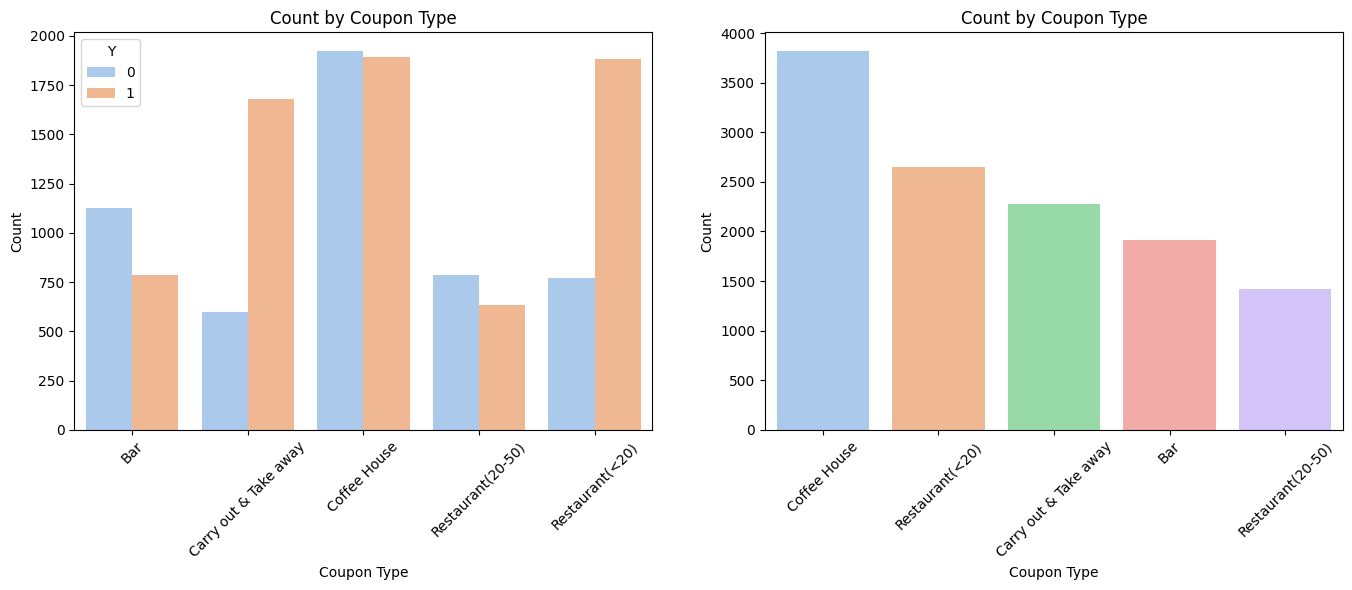

In [11]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

fig423 = sns.barplot(data=grouped_data, x='coupon', y='counts', hue='Y', palette='pastel',  ax=axes[0])
fig423.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type')
axes[0].tick_params(axis='x', rotation=45)

# add some gap between the plots
plt.subplots_adjust(wspace=6.5)

coupontype_count = data['coupon'].value_counts().sort_values(ascending=False)
coupontype_count_df=pd.DataFrame(coupontype_count)
coupontype_count_df = coupontype_count_df.reset_index()
fig424 = sns.barplot(data=coupontype_count_df, x='coupon', y='count', palette='pastel',  ax=axes[1])
fig424.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### 6. <br>
Use a histogram to visualize the temperature column.

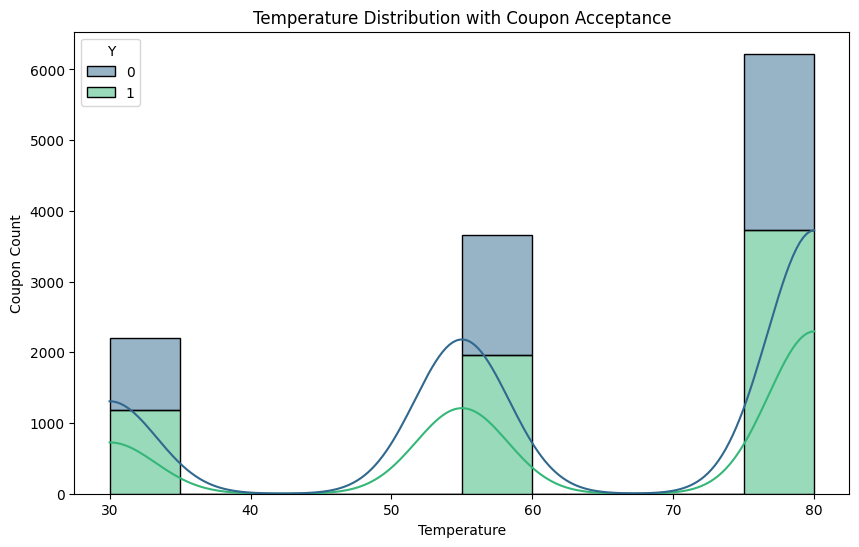

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', bins=10, hue = 'Y', multiple="stack", palette="viridis", kde=True)
plt.xlabel("Temperature")
plt.ylabel("Coupon Count")
plt.title("Temperature Distribution with Coupon Acceptance")
plt.show()

In [13]:
grouped_temp_data_normalized = data.value_counts(subset=['temperature', 'Y'], normalize=True).reset_index(name='proportion')
print(grouped_temp_data_normalized)

   temperature  Y  proportion
0           80  1    0.308883
1           80  0    0.206226
2           55  1    0.162845
3           55  0    0.140326
4           30  1    0.097607
5           30  0    0.084113


**Above plot shows that as temperature increases, the number of people accepting the coupon increases and the Dataframe- 'grouped_temp_data_normalized' shows the rate of acceptance too goes up as temperature increases.**

In [14]:
sample_means = []
sample_size = 100
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
for i in range(1000):
    sample_temp = data['temperature'].sample(sample_size)
    sample_temp_mean = np.mean(sample_temp)
    sample_means= np.append(sample_means, sample_temp_mean)
    pass
mean_of_sample = np.mean(sample_means)
std_of_sample = np.std(sample_means)

Text(0.5, 1.0, 'Mean Temperature Histogram')

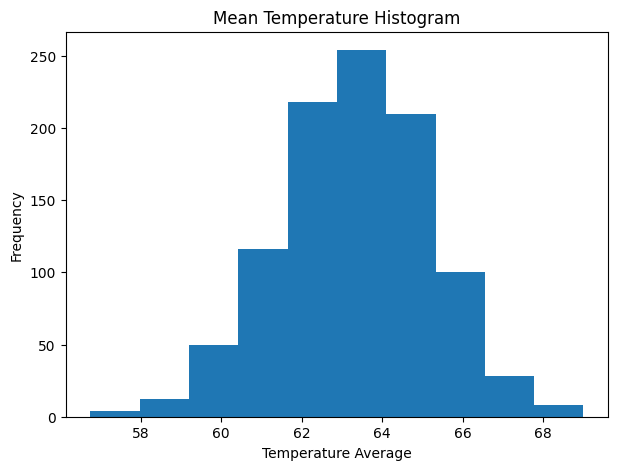

In [15]:
plt.figure(figsize=(7,5))
plt.hist(sample_means)

#plt.xticks(rotation=45)
plt.xlabel('Temperature Average')
plt.ylabel('Frequency')
plt.title('Mean Temperature Histogram')

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. <br>
Create a new `DataFrame` that contains just the bar coupons.


In [16]:
data_bar = data.loc[data['coupon'] == 'Bar']
print(data_bar.shape)
type(data_bar)

(1913, 25)


pandas.core.frame.DataFrame

### 2. <br>
What proportion of bar coupons were accepted?


In [17]:
data_bar_c_acceptance = data_bar['Y'].value_counts(normalize=True)
data_bar_c_acceptance = pd.DataFrame(data_bar_c_acceptance)
print(data_bar_c_acceptance)
print(f'{data_bar_c_acceptance.loc[1, 'proportion']:.2%}')

   proportion
Y            
0    0.588082
1    0.411918
41.19%


### 3. <br>
Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
less_bar = data_bar[data_bar['Bar'].isin(['1~3', 'less1','never'])]
less_bar_acceptance = less_bar.Y.sum()/less_bar.destination.count()
print('People who go to bars 3 or fewer times a month accept coupons at ', f'{less_bar_acceptance:.2%}', ' rate')

more_bar = data_bar[data_bar['Bar'].isin(['4~8', 'gt8'])]
more_bar_acceptance = more_bar.Y.sum()/more_bar.destination.count()
print('People who go to bars more than 3 times a month accept coupons at ', f'{more_bar_acceptance:.2%}', ' rate')

People who go to bars 3 or fewer times a month accept coupons at  37.27%  rate
People who go to bars more than 3 times a month accept coupons at  76.17%  rate


**2 plots below show number of Monthly visit counts by Accepted/Unaccepted**

In [19]:
data_bar_df = data_bar.groupby(['Bar', 'Y']).size().reset_index(name='counts')

# the values in column 'Bar' are not consistent, so we need to clean the data
data_bar_df['Bar'] = data_bar_df['Bar'].str.replace('never', 'Never')
data_bar_df['Bar'] = data_bar_df['Bar'].str.replace('less1', 'Less1')
data_bar_df['Bar'] = data_bar_df['Bar'].str.replace('1~3', '1-3')
data_bar_df['Bar'] = data_bar_df['Bar'].str.replace('4~8', '4-8')
data_bar_df['Bar'] = data_bar_df['Bar'].str.replace('gt8', 'GT8')

# data['Y'] = data['Y'].astype(str)
fig = px.bar(data_bar_df, x='Bar', y='counts', color='Y', barmode='group', title='Bar visit counts categorized by frequency of visit', category_orders={'Bar': ['Never', 'Less1', '1-3', '4-8', 'GT8']})
# set size of the plot
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Bar Visit Frequency per month')
fig.show()

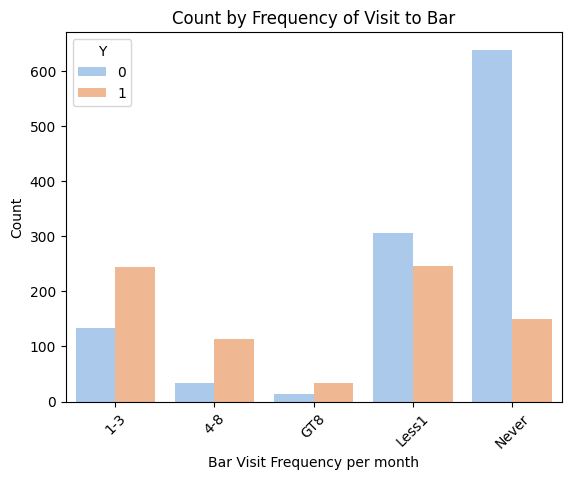

In [20]:
figbar3 = sns.barplot(data=data_bar_df, x='Bar', y='counts', hue='Y', palette='pastel', ci=None)

figbar3.set(xlabel='Bar Visit Frequency per month', ylabel='Count', title='Count by Frequency of Visit to Bar')
plt.xticks(rotation=45)
plt.show()

In [21]:
# 'Never-3' and '4-GT8'
# create a new column 'Bar_group' to group the values in 'Bar' column
valueslteq3 = ['Never', 'Less1', '1-3']
valuesgt3 = ['4-8', 'GT8']
data_bar_df['Bar_Group'] = None
data_bar_df.loc[data_bar_df['Bar'].isin(valueslteq3), 'Bar_Group'] = 'Never-3'
data_bar_df.loc[data_bar_df['Bar'].isin(valuesgt3), 'Bar_Group'] = 'Over3'
data_bar_df.head(10)

,Bar,Y,counts,Bar_Group
0,1-3,0,134,Never-3
1,1-3,1,245,Never-3
2,4-8,0,33,Over3
3,4-8,1,114,Over3
4,GT8,0,13,Over3
5,GT8,1,33,Over3
6,Less1,0,306,Never-3
7,Less1,1,247,Never-3
8,Never,0,639,Never-3
9,Never,1,149,Never-3


Another way to answer question 3

In [22]:
less_bar = data_bar_df[data_bar_df['Bar'].isin(['1-3', 'Less1','Never'])]
less_bar_accepted = data_bar_df.query('Bar in ["1-3", "Less1", "Never"] and Y == 1')
less_bar_total = data_bar_df.query('Bar in ["1-3", "Less1", "Never"]')
less_bar_acceptance = less_bar_accepted.counts.sum()/less_bar_total.counts.sum()
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {less_bar_acceptance:.2%}")

more_bar_accepted = data_bar_df.query('Bar in ["4-8", "GT8"] and Y == 1')
more_bar_total = data_bar_df.query('Bar in ["4-8", "GT8"]')
more_bar_acceptance = more_bar_accepted.counts.sum()/more_bar_total.counts.sum()
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {more_bar_acceptance:.2%}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.27%
Acceptance rate for those who went to a bar more than 3 times a month: 76.17%


Another way to answer question 3

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.27%
Acceptance rate for those who went to a bar more than 3 times a month: 76.17%


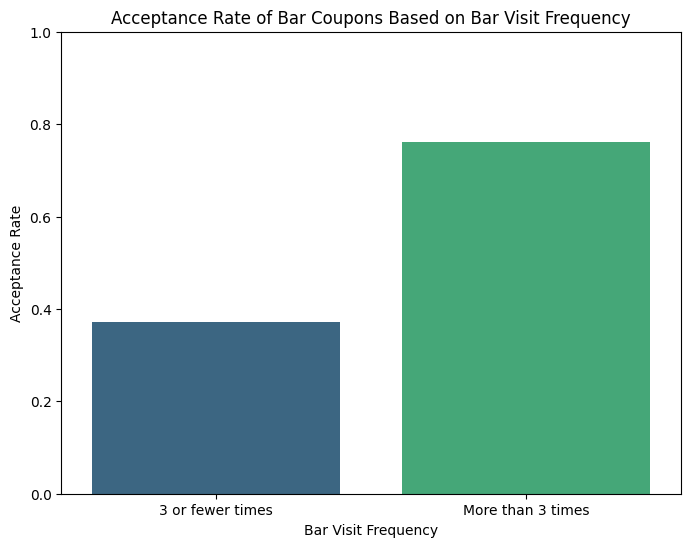

In [23]:
# Create subsets of the data based on bar visit frequency
bar_less_equal_3 = data_bar[data_bar['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_than_3 = data_bar[data_bar['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
acceptance_rate_less_equal_3 = bar_less_equal_3['Y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_equal_3:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2%}")

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Frequency': ['3 or fewer times', 'More than 3 times'],
    'Acceptance Rate': [acceptance_rate_less_equal_3, acceptance_rate_more_than_3]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Acceptance Rate', hue='Frequency', data=acceptance_rates, palette="viridis", dodge=False, legend=False)
plt.title('Acceptance Rate of Bar Coupons Based on Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.xlabel('Bar Visit Frequency')
plt.ylim(0, 1)
plt.show()

In [24]:
data_bar_df_group = data_bar_df.groupby(['Bar_Group', 'Y']).sum('counts').reset_index()
data_bar_df_group

,Bar_Group,Y,counts
0,Never-3,0,1079
1,Never-3,1,641
2,Over3,0,46
3,Over3,1,147


In [25]:
# ratio of acceptance of coupons for customers who visit the bar less than 3 times a month to those who visit the bar more than 3 times a month
# value of column 'counts' where 'Bar_Group' = 'Never-3' and 'Y' = 1 divided by value of column 'counts' where 'Bar_Group' = 'Over3' and 'Y' = 1
ratio = data_bar_df_group.loc[(data_bar_df_group['Bar_Group'] == 'Never-3') & (data_bar_df_group['Y'] == 1)]['counts'].values[0] / data_bar_df_group.loc[(data_bar_df_group['Bar_Group'] == 'Over3') & (data_bar_df_group['Y'] == 1)]['counts'].values[0]

# ratio = data_bar_df_group[1]['counts'] / data_bar_df_group[3]['counts']
print('Ratio of number of visits with accepted coupons less than or equal to 3 TO number of visits with accepted coupons greater than 3 is', ratio.round(2))

Ratio of number of visits with accepted coupons less than or equal to 3 TO number of visits with accepted coupons greater than 3 is 4.36


### 4. <br>
Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
# Find the coupon acceptance rate for drivers who 
#    (1) go to bar 1 or more times a month, AND
#    (2) are over the age of 25
cpn_accept_rate_gt1_ot25_drivers = data_bar[(data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar['age'] > '25')]['Y'].mean()
# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for those who went to bar 1 or more times and older than 25yrs of age: {cpn_accept_rate_gt1_ot25_drivers:.2%}")

#For the next calculation, Find the coupon acceptance rate for drivers EXCLUDING the ones who
#    (1) go to bar less than 1 times a month, AND
#    (2) are below the age of 25
cpn_accept_rate_other_drivers = data_bar[~((data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar['age'] > '25'))]['Y'].mean()
# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for all other drivers (went to bar less than 1 time and/or younger than 25yrs of age): {cpn_accept_rate_other_drivers:.2%}")

Coupon acceptance rate for those who went to bar 1 or more times and older than 25yrs of age: 68.28%
Coupon acceptance rate for all other drivers (went to bar less than 1 time and/or younger than 25yrs of age): 33.73%


Another way to answer question 4

In [27]:
df1 = data_bar[~data_bar["Bar"].isin(['never', 'less1']) & ~data_bar['age'].isin(['below21', '21'])]
df1_acceptance = df1.Y.sum()/df1.destination.count()

merged_df = data_bar.merge(df1, how='left', indicator=True)
print(merged_df['_merge'].value_counts())

# Get the rows that are only in the left dataframe
df2 = merged_df[merged_df['_merge'] == 'left_only']

# Drop the _merge column
df2 = df2.drop(columns='_merge')
df2_acceptance = df2.Y.sum()/df2.destination.count()

print("Drivers who are older than 25 and go to bar more than once a month accept coupon at ",df1_acceptance," rate")
print("All other drivers accept coupon at ",df2_acceptance," rate. Which is a ", (df1_acceptance - df2_acceptance) * 100," percent point difference." )

_merge
left_only     1510
both           403
right_only       0
Name: count, dtype: int64
Drivers who are older than 25 and go to bar more than once a month accept coupon at  0.6898263027295285  rate
All other drivers accept coupon at  0.33774834437086093  rate. Which is a  35.207795835866754  percent point difference.


### 5. <br>
Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [28]:
# cpn_accept_rate_gt1_notKid_notFFF_drivers = data_bar[(data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & ~data_bar.query('passanger not in ['Kid']) & ~(data_bar['occupation'].isin(['Farming Fishing & Forestry']))]['Y'].mean()
# Find the coupon acceptance rate for drivers who 
#    (1) go to bar 1 or more times a month, AND
#    (2) had passanger in the car that are not Kid(s)
#    (3) had occupations other than farming, fishing, or forestry
cpn_accept_rate_gt1_notKid_notFFF_drivers = data_bar[data_bar['Bar'].isin(['1~3', '4~8', 'gt8']) & (data_bar['passanger'] != 'Kid(s)') & (data_bar['occupation'] != 'Farming Fishing & Forestry')]['Y'].mean()
# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for those who went to bar 1 or more times with passenger other than Kids and do not work in Farming, Fishing or Forestry: {cpn_accept_rate_gt1_notKid_notFFF_drivers:.2%}")

# Find the coupon acceptance rate for drivers Excluding ones who 
#    (1) go to bar 1 or more times a month, AND
#    (2) had passanger in the car that are not Kid(s)
#    (3) had occupations other than farming, fishing, or forestry
cpn_accept_rate_NOT_gt1_notKid_notFFF_drivers = data_bar[~((data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar['passanger'] != 'Kid(s)') & ~(data_bar['occupation'].isin(['Farming Fishing & Forestry'])))]['Y'].mean()
# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for those who went to bar less than once a month or with Kids or work in FFF industry: {cpn_accept_rate_NOT_gt1_notKid_notFFF_drivers:.2%}")

Coupon acceptance rate for those who went to bar 1 or more times with passenger other than Kids and do not work in Farming, Fishing or Forestry: 70.94%
Coupon acceptance rate for those who went to bar less than once a month or with Kids or work in FFF industry: 29.79%


### 6. <br>
Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [29]:
condition_1 = data_bar['Bar'].isin(['1~3', '4~8', 'gt8']) & \
            (data_bar['passanger'] != 'Kid(s)') & \
            (data_bar['maritalStatus'] != 'Widowed')

subset_1 = data_bar[condition_1]
acceptance_rt_sub_1 = subset_1['Y'].mean()
print(f"Coupon acceptance rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed : {acceptance_rt_sub_1:.2%}")

condition_2 = data_bar['Bar'].isin(['1~3', '4~8', 'gt8']) & \
            (data_bar['age'] < '30')

subset_2 = data_bar[condition_2]
acceptance_rt_sub_2 = subset_2['Y'].mean()
print(f"Coupon acceptance rate for those who go to bars more than once a month and are under the age of 30 : {acceptance_rt_sub_2:.2%}")

condition_3 = data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8']) & \
            (data_bar['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

subset_3 = data_bar[condition_3]
acceptance_rt_sub_3 = subset_3['Y'].mean()
print(f"Coupon acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K : {acceptance_rt_sub_3:.2%}")

Coupon acceptance rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed : 70.94%
Coupon acceptance rate for those who go to bars more than once a month and are under the age of 30 : 72.96%
Coupon acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K : 45.65%


### 7. <br>
Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Regular visitors accept coupons more over non-regular.
Regular visitors over age 25 accept coupons more over those under25 and/or non-regulars.
Acceptance rate is higher for for those who go to bar 1 or more times with passenger other than Kids and do not work in Farming, Fishing or Forestry.

Acceptance rate is higher among those who go to bars more than once a month, had passengers that were not a kid, and were not widowed.
Acceptance rate is higher among those who go to bars more than once a month and are under the age of 30.
Coupon acceptance rate is close to 50% among those who go to cheap restaurants more than 4 times a month and income is less than 50K.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [30]:
data['temperature'].unique()
data['temperature'] = data['temperature'].astype(str)

grouped_temp_data = data.groupby(['temperature', 'coupon', 'Y']).size().reset_index(name='counts')
grouped_temp_data.head(12)

,temperature,coupon,Y,counts
0,30,Bar,0,268
1,30,Bar,1,132
2,30,Carry out & Take away,0,171
3,30,Carry out & Take away,1,543
4,30,Coffee House,0,167
5,30,Coffee House,1,132
6,30,Restaurant(20-50),0,168
7,30,Restaurant(20-50),1,91
8,30,Restaurant(<20),0,242
9,30,Restaurant(<20),1,281


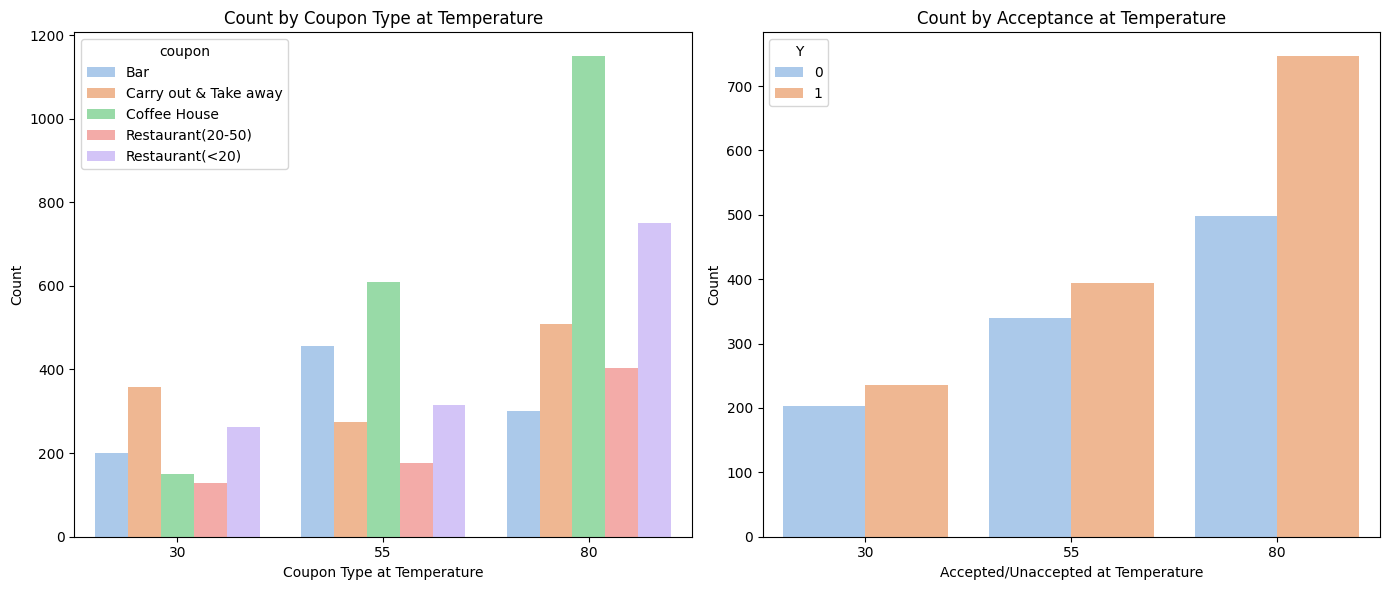

In [31]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

fig533 = sns.barplot(data=grouped_temp_data, x='temperature', y='counts', hue='coupon', palette='pastel', ci=None,  ax=axes[0])
fig533.set(xlabel='Coupon Type at Temperature', ylabel='Count', title='Count by Coupon Type at Temperature')
axes[0].tick_params(axis='x')

# add some gap between the plots
plt.subplots_adjust(wspace=.5)

fig534 = sns.barplot(data=grouped_temp_data, x='temperature', y='counts', hue='Y', palette='pastel', ci=None,  ax=axes[1])
fig534.set(xlabel='Accepted/Unaccepted at Temperature', ylabel='Count', title='Count by Acceptance at Temperature')
axes[1].tick_params(axis='x')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

From the plots below and the 2 plots above, it looks like Restaurant<20 have a Higher acceptance rate by customers and therefore company issuing the coupons should issue more of these coupons. <br>
Also at 30 degrees, Carry Out coupons have a higher acceptance rate by customers and therefore company issuing the coupons should issue more of these coupons at 30 degrees. <br>
Though majority of bar coupons are rejected at all temperatures, their acceptance rate is higher at 55 and 80 degrees than at 30 degrees. Therefore, company issuing the coupons should issue more of these coupons at 55 and 80 degrees. <br>
2nd plot above shows coupons acceptance rate is very high at 80 degrees. Therefore, company issuing the coupons should issue more coupons at 80 degrees. <br>

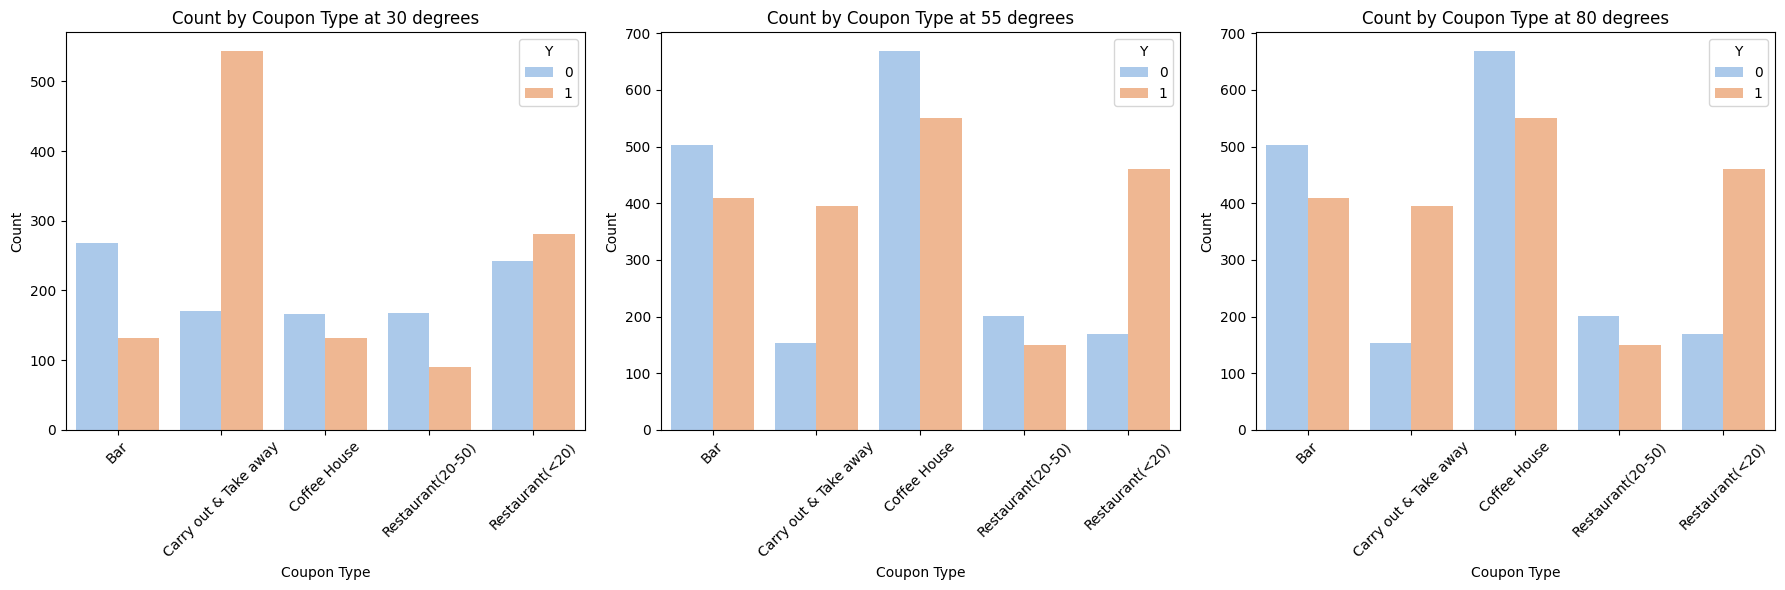

In [32]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

fig34 = sns.barplot(data=grouped_temp_data.query('temperature == "30"'), x='coupon', y='counts', hue='Y', palette='pastel',  ax=axes[0])
fig34.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type at 30 degrees')
axes[0].tick_params(axis='x', rotation=45)

fig35 = sns.barplot(data=grouped_temp_data.query('temperature == "55"'), x='coupon', y='counts', hue='Y', palette='pastel',  ax=axes[1])
fig35.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type at 55 degrees')
axes[1].tick_params(axis='x', rotation=45)

fig36 = sns.barplot(data=grouped_temp_data.query('temperature == "55"'), x='coupon', y='counts', hue='Y', palette='pastel',  ax=axes[2])
fig36.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type at 80 degrees')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Investigation by Age

In [33]:
data['age'] = data['age'].astype(str)

grouped_age_data = data.groupby(['age', 'coupon', 'Y']).size().reset_index(name='counts')
grouped_age_data.head(12)

,age,coupon,Y,counts
0,21,Bar,0,197
1,21,Bar,1,200
2,21,Carry out & Take away,0,121
3,21,Carry out & Take away,1,345
4,21,Coffee House,0,407
5,21,Coffee House,1,437
6,21,Restaurant(20-50),0,162
7,21,Restaurant(20-50),1,122
8,21,Restaurant(<20),0,143
9,21,Restaurant(<20),1,403


                Y   age
age                    
21       0.594009  2537
26       0.599833  2399
31       0.552208  1925
36       0.538707  1253
41       0.574648  1065
46       0.576807   664
50plus   0.507506  1732
below21  0.632937   504


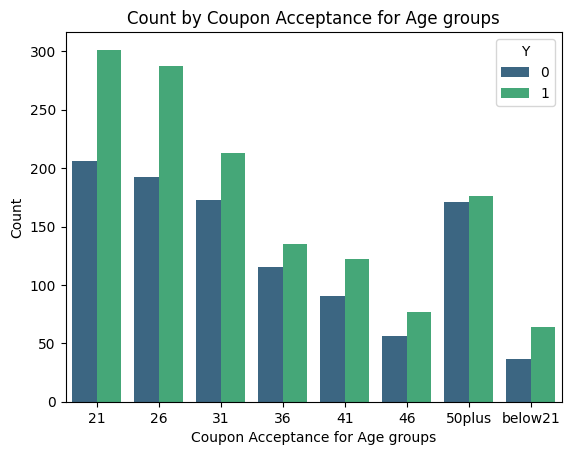

In [34]:
result_age = data.groupby('age').agg({'Y': 'mean', 'age': 'count'})
print(result_age)
fig573 = sns.barplot(data=grouped_age_data, x='age', y='counts', hue='Y', palette='viridis', ci=None)
fig573.set(xlabel='Coupon Acceptance for Age groups', ylabel='Count', title='Count by Coupon Acceptance for Age groups')
axes[0].tick_params(axis='x')

Above shows that acceptance rate is highest among younger people and decreases as age increases until age of 40. The coupon count is least in 'below21' age group, so company can focus on providing more coupons to below21s.

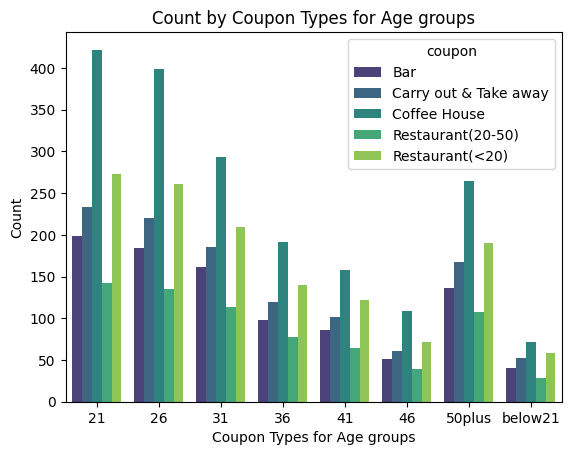

In [35]:
fig574 = sns.barplot(data=grouped_age_data, x='age', y='counts', hue='coupon', palette='viridis', ci=None)
fig574.set(xlabel='Coupon Types for Age groups', ylabel='Count', title='Count by Coupon Types for Age groups')
axes[0].tick_params(axis='x')

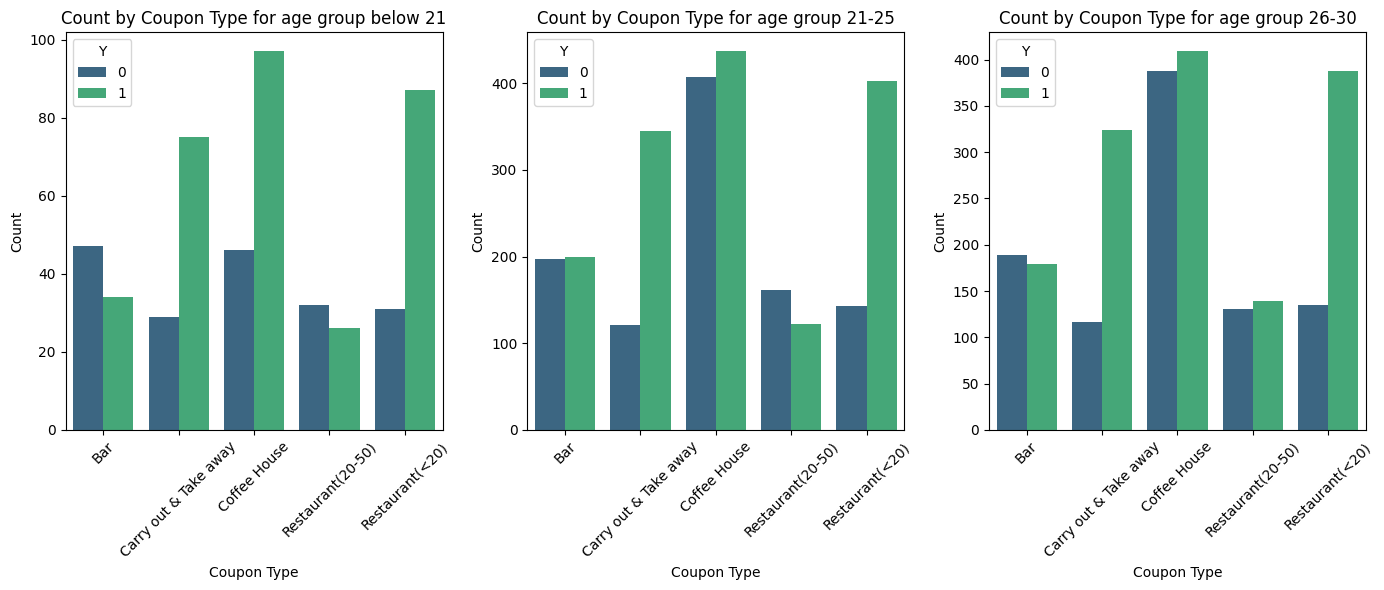

In [36]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

fig34 = sns.barplot(data=grouped_age_data.query('age == "below21"'), x='coupon', y='counts', hue='Y', palette='viridis',  ax=axes[0])
fig34.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type for age group below 21')
axes[0].tick_params(axis='x', rotation=45)

fig35 = sns.barplot(data=grouped_age_data.query('age == "21"'), x='coupon', y='counts', hue='Y', palette='viridis',  ax=axes[1])
fig35.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type for age group 21-25')
axes[1].tick_params(axis='x', rotation=45)

fig36 = sns.barplot(data=grouped_age_data.query('age == "26"'), x='coupon', y='counts', hue='Y', palette='viridis',  ax=axes[2])
fig36.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type for age group 26-30')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

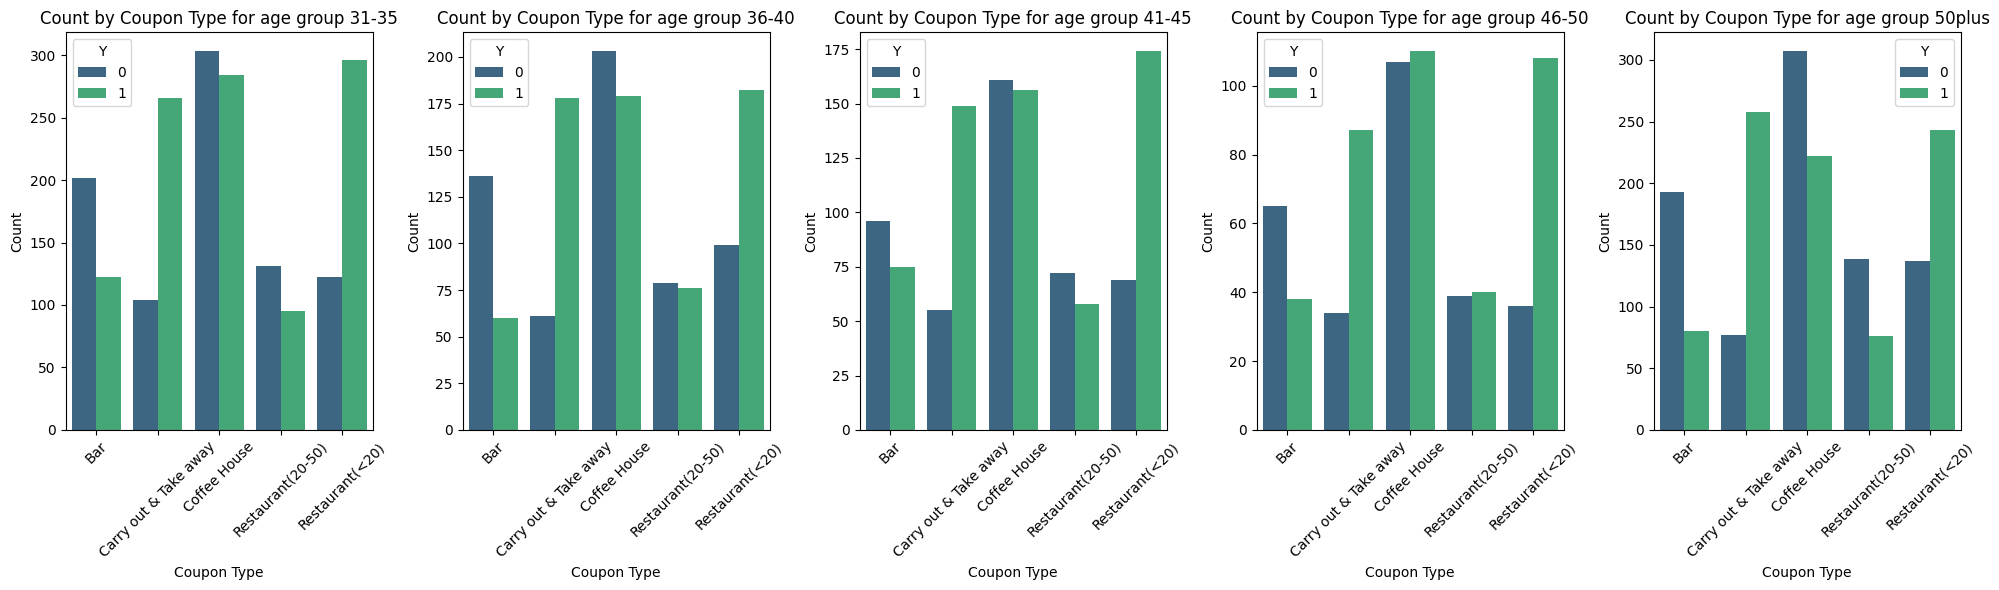

In [37]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

fig34 = sns.barplot(data=grouped_age_data.query('age == "31"'), x='coupon', y='counts', hue='Y', palette='viridis',  ax=axes[0])
fig34.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type for age group 31-35')
axes[0].tick_params(axis='x', rotation=45)

fig35 = sns.barplot(data=grouped_age_data.query('age == "36"'), x='coupon', y='counts', hue='Y', palette='viridis',  ax=axes[1])
fig35.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type for age group 36-40')
axes[1].tick_params(axis='x', rotation=45)

fig36 = sns.barplot(data=grouped_age_data.query('age == "41"'), x='coupon', y='counts', hue='Y', palette='viridis',  ax=axes[2])
fig36.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type for age group 41-45')
axes[2].tick_params(axis='x', rotation=45)

fig37 = sns.barplot(data=grouped_age_data.query('age == "46"'), x='coupon', y='counts', hue='Y', palette='viridis',  ax=axes[3])
fig37.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type for age group 46-50')
axes[3].tick_params(axis='x', rotation=45)

fig38 = sns.barplot(data=grouped_age_data.query('age == "50plus"'), x='coupon', y='counts', hue='Y', palette='viridis',  ax=axes[4])
fig38.set(xlabel='Coupon Type', ylabel='Count', title='Count by Coupon Type for age group 50plus')
axes[4].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Above plots shows that Acceptance rate for Coffee coupons is not good among people over 30 years old. But earllier plots show that 31-45 year olds receive Coffee coupons more than any other coupons. The company can focus on providing more of Carry Out and Restaurant less than $20 Coupons to people over 30 years old as acceptance rate is good for these coupons and company may reduce number of coffee coupons they are providing.

### Check Destination, Distance to Coupon and Acceptance Rate

Check if coupon attributes - direction_same and direction_opposite are Mutually exclusive in the Data set.

In [38]:
# check if columns 'direction_same' and 'direction_opp' have the same values
data['direction_same'].equals(data['direction_opp'])

False

In [39]:
data_destination = data.groupby(['destination', 'direction_same', 'Y']).size().reset_index(name='counts')
print(data_destination.head(12))
data_destination.shape

       destination  direction_same  Y  counts
0             Home               0  0     932
1             Home               0  1     698
2             Home               1  0     585
3             Home               1  1     870
4  No Urgent Place               0  0    2185
5  No Urgent Place               0  1    3785
6             Work               0  0    1001
7             Work               0  1     879
8             Work               1  0     499
9             Work               1  1     645


(10, 4)

Above output shows that Coupons in Opposite direction are highly accepted only when going to a Non-Urgent place. Otherwise, coupons in same direction are preferred.


In [40]:
data_destination_sum = data.groupby(['destination', 'direction_same']).size().reset_index(name='counts')
print(data_destination_sum.head(12))
data_destination_sum.shape

       destination  direction_same  counts
0             Home               0    1630
1             Home               1    1455
2  No Urgent Place               0    5970
3             Work               0    1880
4             Work               1    1144


(5, 3)

Above result shows that More coupons are provided in Opposite direction when going Home or to Work. Based on previous analysis, providing MORE coupons in same direction will show more Acceptance.